<a href="https://colab.research.google.com/github/mauricioaalmeida/ONE-ML/blob/main/Desafios_Analise_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

### Importação de Bibliotécas


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pickle

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Aula 1

### Desafio 1:

A primeira etapa em um projeto de machine learning é a obtenção de dados. A partir dessa obtenção, podemos fazer a leitura dos dados para se construir um modelo. Como tarefa inicial, faça a leitura da base de dados e verifique a presença de dados nulos.

In [5]:
url = 'https://raw.githubusercontent.com/mauricioaalmeida/ONE-ML/refs/heads/main/data/churn.csv'
df = pd.read_csv(url)
df.head()

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
    colunas = { 'nome': df.columns.tolist(),
                'Categorica': lambda x: df[x].dtype == 'object',
                'Numerica': lambda x: pd.api.types.is_numeric_dtype(df[x]),
                'Data': lambda x: pd.api.types.is_datetime64_any_dtype(df[x]),
                'Booleano': lambda x: pd.api.types.is_bool_dtype(df[x])
    }
    colunas

{'nome': ['id_cliente',
  'score_credito',
  'pais',
  'sexo_biologico',
  'idade',
  'anos_de_cliente',
  'saldo',
  'servicos_adquiridos',
  'tem_cartao_credito',
  'membro_ativo',
  'salario_estimado',
  'churn'],
 'Categorica': <function __main__.<lambda>(x)>,
 'Numerica': <function __main__.<lambda>(x)>,
 'Data': <function __main__.<lambda>(x)>,
 'Booleano': <function __main__.<lambda>(x)>}

### Desafio 2

Após a leitura dos dados, é importante conhecer os dados, checando inconsistências e entendendo o comportamento de cada uma das colunas. Nesta tarefa, faça uma análise exploratória utilizando gráficos para as **variáveis categóricas** da base de dados, incluindo a **variável alvo** churn. Para essas variáveis, pode ser utilizado gráficos de barras para fazer a contagem das categorias e fazer um agrupamento por cores de acordo com as categorias da variável alvo.

In [8]:
px.histogram(df, x='pais', color = 'churn', barmode='group')

In [9]:
px.histogram(df, x='sexo_biologico', color = 'churn', barmode='group')

In [10]:

px.histogram(df, x='servicos_adquiridos', color = 'churn', barmode='group')

In [11]:
px.histogram(df, x='tem_cartao_credito', color = 'churn', barmode='group')

In [12]:
px.histogram(df, x='membro_ativo', color = 'churn', barmode='group')

### Desafio 3

Depois de explorar as variáveis categóricas, chegou a vez das **variáveis numéricas**. Construa gráficos de distribuição como boxplots ou histogramas para analisar o comportamento dos valores numéricos e checar se existem valores inconsistentes.

In [13]:
px.box(df, x='score_credito', color='churn')

In [14]:
px.histogram(df, x='score_credito', color='churn')



In [15]:
px.box(df, x='idade', color='churn')

In [16]:
px.histogram(df, x='idade', color='churn')

#'anos_de_cliente', 'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo', 'salario_estimado', 'churn'

In [17]:
px.box(df, x='anos_de_cliente', color='churn')


In [18]:
px.box(df, x='saldo', color='churn')


In [19]:
px.histogram(df, x='saldo', color='churn')

In [20]:
px.box(df, x='salario_estimado', color='churn')


In [21]:
px.histogram(df, x='salario_estimado', color='churn')

In [22]:
#'score_credito', 'pais', 'sexo_biologico', 'idade', 'anos_de_cliente', 'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo', 'salario_estimado', 'churn'

In [23]:
colunas = df.columns.tolist()
col_categoricas = df.select_dtypes(include=['object']).columns.tolist()
col_numericas = df.select_dtypes(include=['number']).columns.tolist()
col_alvo='churn'
colunas.remove(col_alvo)
colunas

['id_cliente',
 'score_credito',
 'pais',
 'sexo_biologico',
 'idade',
 'anos_de_cliente',
 'saldo',
 'servicos_adquiridos',
 'tem_cartao_credito',
 'membro_ativo',
 'salario_estimado']

In [24]:
print (col_categoricas)
print (col_numericas)

['pais', 'sexo_biologico']
['id_cliente', 'score_credito', 'idade', 'anos_de_cliente', 'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo', 'salario_estimado', 'churn']


In [25]:
col_categoricas = ['pais', 'sexo_biologico', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo']
col_numericas = ['score_credito', 'idade', 'anos_de_cliente', 'saldo', 'salario_estimado']

# Aula 2

### Desafio 1:

Para utilizar os dados nos algoritmos de Machine Learning, precisamos informar quais são as variáveis explicativas e qual é a variável alvo. Neste desafio, faça a separação da base de dados de churn entre as variáveis explicativas, armazenando em uma variável x e a variável alvo em y.


In [26]:
x = df.drop(['churn', 'id_cliente'], axis=1)


y = df['churn']

In [27]:
x.head()

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,619,França,Mulher,42,2,0.00,1,1,1,101348.88
1,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58
2,502,França,Mulher,42,8,159660.80,3,1,0,113931.57
3,699,França,Mulher,39,1,0.00,2,0,0,93826.63
4,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10


### Desafio 2:

Variáveis categóricas que estejam em formato de texto não podem ser utilizadas diretamente nos modelos de Machine Learning. Neste desafio, faça a transformação das variáveis categóricas para formato numérico usando o [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), utilizando o parâmetro `drop='if_binary'` caso alguma variável tenha apenas 2 categorias.

In [28]:
print (col_categoricas)
print (col_numericas)

['pais', 'sexo_biologico', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo']
['score_credito', 'idade', 'anos_de_cliente', 'saldo', 'salario_estimado']


In [29]:
colunas = x.columns
one_hot = make_column_transformer((
    OneHotEncoder( drop = 'if_binary'),
    col_categoricas
),
    remainder='passthrough',
    sparse_threshold=0)


In [30]:
x = one_hot.fit_transform(x)

In [31]:
one_hot.get_feature_names_out()

array(['onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__sexo_biologico_Mulher',
       'onehotencoder__servicos_adquiridos_1',
       'onehotencoder__servicos_adquiridos_2',
       'onehotencoder__servicos_adquiridos_3',
       'onehotencoder__servicos_adquiridos_4',
       'onehotencoder__tem_cartao_credito_1',
       'onehotencoder__membro_ativo_1', 'remainder__score_credito',
       'remainder__idade', 'remainder__anos_de_cliente',
       'remainder__saldo', 'remainder__salario_estimado'], dtype=object)

In [32]:
pd.DataFrame(x, columns=one_hot.get_feature_names_out())

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,onehotencoder__servicos_adquiridos_1,onehotencoder__servicos_adquiridos_2,onehotencoder__servicos_adquiridos_3,onehotencoder__servicos_adquiridos_4,onehotencoder__tem_cartao_credito_1,onehotencoder__membro_ativo_1,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,619.0,42.0,2.0,0.00,101348.88
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,112542.58
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,502.0,42.0,8.0,159660.80,113931.57
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,699.0,39.0,1.0,0.00,93826.63
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,850.0,43.0,2.0,125510.82,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,771.0,39.0,5.0,0.00,96270.64
9996,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,516.0,35.0,10.0,57369.61,101699.77
9997,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,709.0,36.0,7.0,0.00,42085.58
9998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,772.0,42.0,3.0,75075.31,92888.52


### Desafio 3:

A variável alvo, como é do tipo categórica, também precisa passar por um tratamento similar às variáveis explicativas categóricas para que possa ser usada nos algoritmos. Nessa tarefa, utilize o método [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) para fazer a transformação da variável churn.

In [33]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 0, 1, ..., 1, 1, 0])

# Aula 3

### Desafio 1:

A separação dos dados entre conjunto de treinamento e teste é essencial para compreender se um modelo está conseguindo aprender os padrões e generalizar para novos dados. Nesta tarefa, faça a divisão da base de dados entre treinamento e teste de forma estratificada.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=5)

### Desafio 2:

Um modelo de base é muito importante para definir um critério de comparação para modelos mais complexos. Nesta etapa, crie um modelo de base com o `DummyClassifier` e encontre a taxa de acerto com o método `score`.

In [35]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)

dummy.score(x_test, y_test)

0.7964

### Desafio 3:

A árvore de decisão é um algoritmo que faz as classificações a partir de decisões simples tomadas a partir dos dados. Temos que tomar certo cuidado para não utilizar uma profundidade muito grande, porque isso pode provocar um sobreajuste do modelo aos dados de treinamento. Neste desafio, crie um modelo de árvore de decisão com o parâmetro `max_depth=4`, avalie o desempenho do modelo nos dados de teste e visualize as decisões da árvore usando o método `plot_tree`.

In [36]:
colunas

Index(['score_credito', 'pais', 'sexo_biologico', 'idade', 'anos_de_cliente',
       'saldo', 'servicos_adquiridos', 'tem_cartao_credito', 'membro_ativo',
       'salario_estimado'],
      dtype='object')

In [37]:
one_hot.get_feature_names_out()

array(['onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__sexo_biologico_Mulher',
       'onehotencoder__servicos_adquiridos_1',
       'onehotencoder__servicos_adquiridos_2',
       'onehotencoder__servicos_adquiridos_3',
       'onehotencoder__servicos_adquiridos_4',
       'onehotencoder__tem_cartao_credito_1',
       'onehotencoder__membro_ativo_1', 'remainder__score_credito',
       'remainder__idade', 'remainder__anos_de_cliente',
       'remainder__saldo', 'remainder__salario_estimado'], dtype=object)

In [38]:
x_cols = ['Alemanha', 'Espanha',
       'França',
       'Mulher',
       'servicos_1',
       'servicos_2',
       'servicos_3',
       'servicos_4',
       'tem_cartao_credito',
       'membro_ativo', #'id_cliente',
       'score_credito', 'idade',
       'anos_de_cliente', 'saldo',
       'salario_estimado']

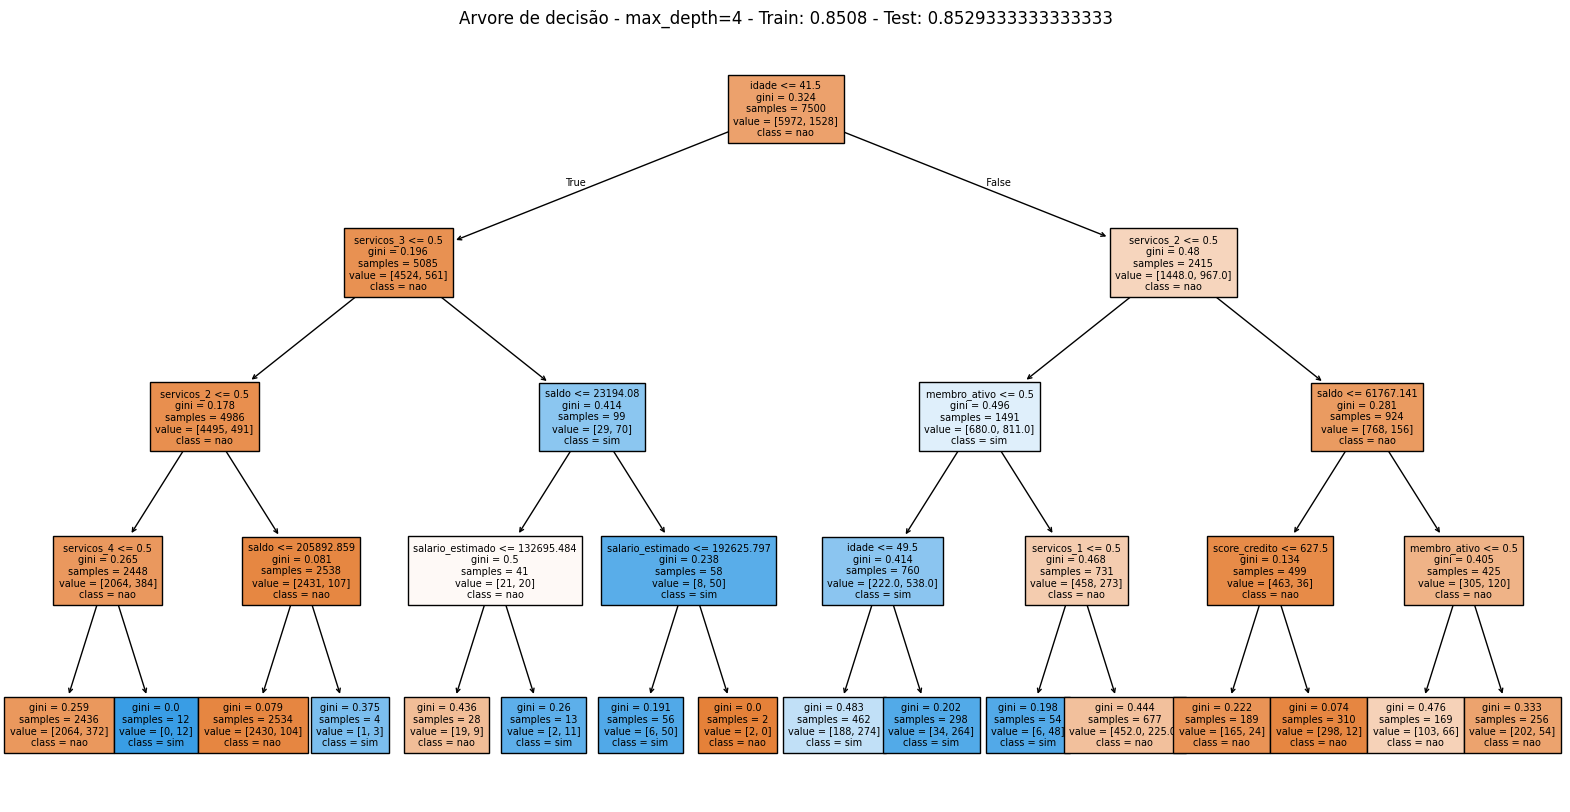

In [39]:
tree = DecisionTreeClassifier(max_depth=4, random_state=5)
tree.fit(x_train, y_train)
plt.figure(figsize=(20,10))
plot_tree(tree, class_names= ['nao', 'sim'], feature_names=x_cols, filled=True, fontsize=7)
plt.title(f'Arvore de decisão - max_depth={tree.get_depth()} - Train: {tree.score(x_test, y_test)} - Test: {tree.score(x_train, y_train)}')
plt.show()

# Aula 4

### Desafio 1:

A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma escala e garantir que todas as características tenham o mesmo impacto no modelo. Nesta tarefa, faça a normalização da base de dados usando o [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).


In [40]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_train)
x_teste_normalizado = normalizacao.transform(x_test)
pd.DataFrame(x_treino_normalizado, columns=one_hot.get_feature_names_out())

,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__sexo_biologico_Mulher,onehotencoder__servicos_adquiridos_1,onehotencoder__servicos_adquiridos_2,onehotencoder__servicos_adquiridos_3,onehotencoder__servicos_adquiridos_4,onehotencoder__tem_cartao_credito_1,onehotencoder__membro_ativo_1,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__salario_estimado
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.796,0.216216,0.8,0.000000,0.267600
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.612,0.256757,0.2,0.000000,0.338919
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.634,0.256757,0.5,0.386645,0.890516
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.514,0.040541,0.0,0.000000,0.580365
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.374,0.270270,0.6,0.594774,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.590,0.391892,0.9,0.637940,0.609048
7496,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.676,0.229730,0.6,0.000000,0.127054
7497,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.646,0.229730,0.6,0.000000,0.492884
7498,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.720,0.202703,0.2,0.000000,0.364454


### Desafio 2:

Com os dados normalizados, podemos utilizar o modelo KNN, que faz cálculos de distância para encontrar os vizinhos mais próximos. Nesta atividade, crie um modelo KNN usando o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) com os dados normalizados e avalie o desempenho nos dados de teste, também normalizados.

In [41]:
knn = KNeighborsClassifier()
knn.fit(x_treino_normalizado, y_train)
knn.score(x_teste_normalizado, y_test)

0.8288

### Desafio 3:

Após a construção dos modelos, é o momento de comparar os resultados e selecionar aquele que tem o melhor desempenho. Neste desafio, avalie a taxa de acerto dos modelos `DummyClassifier`, `DecisionTreeClassifier` e `KNeighborsClassifier` que foram construídos nos outros desafios utilizando o método `score` e depois armazene o modelo com melhor acurácia em um arquivo `pickle`. Os modelos de transformação também precisam ser armazenados, que é o caso do `OneHotEncoder` e do `MinMaxScaler`, caso o KNN tenha o melhor desempenho.

In [42]:
print(f'Acurácia Dummy : {dummy.score(x_test, y_test)}')
print(f'Acurácia Árvore: {tree.score(x_test, y_test)}')
print(f'Acurácia KNN   : {knn.score(x_teste_normalizado, y_test)}')

Acurácia Dummy : 0.7964
Acurácia Árvore: 0.8508
Acurácia KNN   : 0.8288


In [43]:
with open('modelo_onehotenc.pkl', 'wb') as f:
    pickle.dump(one_hot, f)
with open('modelo_labelenc.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
with open('modelo_tree.pkl', 'wb') as f:
    pickle.dump(tree, f)

with open('modelo_knn.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('modelo_normalizacao.pkl', 'wb') as f:
    pickle.dump(normalizacao, f)

### Desafio 4:

Depois que o modelo está em produção, já pode ser utilizado para classificar novos dados. Neste desafio, faça a leitura dos arquivos `pickle` dos modelos que foram salvos no desafio anterior e utilize os modelos para fazer a previsão do seguinte registro:

```
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': ['sim'],
    'membro_ativo': ['sim'],
    'salario_estimado': [85270.00]
})
```


In [44]:
modelo_onehot = pd.read_pickle('modelo_onehotenc.pkl')
modelo_label = pd.read_pickle('modelo_labelenc.pkl')
modelo_tree = pd.read_pickle('modelo_tree.pkl')

modelo_knn = pd.read_pickle('modelo_knn.pkl')
modelo_normalizacao = pd.read_pickle('modelo_normalizacao.pkl')

In [45]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [27],
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],
    'tem_cartao_credito': [1],
    'membro_ativo': [1],
    'salario_estimado': [85270.00]
})

In [46]:
novo_dado

,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,850,França,Homem,27,3,56000,1,1,1,85270.0


In [47]:
predicao = modelo_tree.predict(modelo_onehot.transform(novo_dado))
print (modelo_label.inverse_transform(predicao))

[0]


## Encontrando uma folha da árvore para testar o modelo

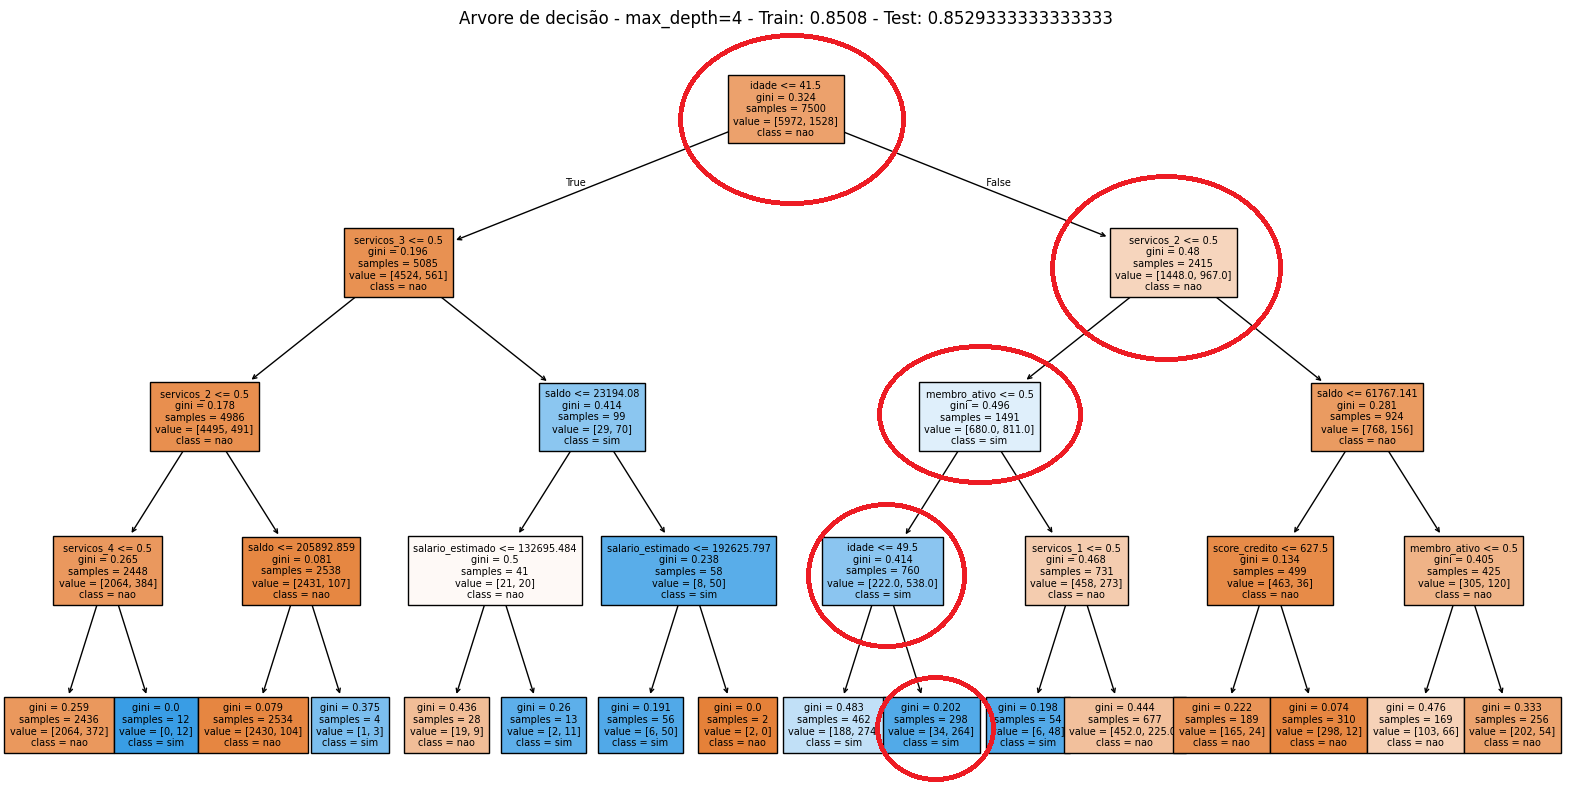

In [49]:
novo_dado = pd.DataFrame({
    'score_credito': [850],
    'pais':['França'],
    'sexo_biologico':['Homem'],
    'idade': [51], # Idade > 41.5 e > 49.5
    'anos_de_cliente': [3],
    'saldo': [56000],
    'servicos_adquiridos': [1],# Serviço 2 < 0.5
    'tem_cartao_credito': [1],
    'membro_ativo': [0], # < 0.5
    'salario_estimado': [85270.00]
})

predicao = modelo_tree.predict(modelo_onehot.transform(novo_dado))
print (modelo_label.inverse_transform(predicao))

[1]


### Prevendo o mesmo dado com o KNN

In [50]:
predicao = modelo_knn.predict(modelo_onehot.transform(novo_dado))
print (modelo_label.inverse_transform(predicao))

[0]
